# **1st DNN for assignment 5**

**Task**

* Change the code 8 or your own 4th Code from Assignment 4 to include:
  1. image normalization
  2. L2 regularization
  3. ReLU after BN

* Run your new code for 40 epochs and save the model with highest validation accuracy
* Find out 25 misclassified images from the validation dataset and create an image gallery
* Submit
 

**This is version 5 for code picked from Assignment5-1stDNN_v4.3  **

Version 1: Adding Inage Normalization
Version 2 L2 Reg
Version 3 Relu after BN
Version 4 Tuning and saving model for highers accuracy
**Version 5 Finding 25 missclassified images and putting in a folder**


*Changes and Result*

Able to figure out indexes of miss classified images

Need work on Visualization on images 


installing and Importing Keras for current solution

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing Numpy and Keras modules as well as mnist data set.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
#preparing check point for saving weights via callback
from google.colab import drive
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Load pre-shuffled MNIST data into train and test sets

Loading mnist data set in train and test variables.

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Ploting sample from train data set.

(60000, 28, 28)


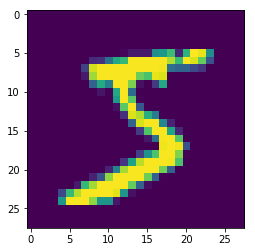

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshaping all train and test data to a uniform size.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Regularizing train and test data for float data type and division wiht 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Visualizing train out put

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Viewing tranformed train out put matrix

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Adding Image normalization

In [11]:
# standardizing a image dataset
from keras.preprocessing.image import ImageDataGenerator

'''
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
'''

# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), Y_test.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
train_iterator = datagen.flow(X_train, Y_train, batch_size=64)

# get batch iterator for validation
validation_generator = datagen.flow(X_test, Y_test)


# get a batch
batchX, batchy = train_iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
train_iterator1 = datagen.flow(X_train, Y_train, batch_size=len(X_train), shuffle=False)
# get a batch
batchX, batchy = train_iterator1.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=0.131 (0.308), test=0.133 (0.300)
Data Generator mean=0.131, std=0.308
(64, 28, 28, 1) 0.009484502 1.0117966
(60000, 28, 28, 1) -4.9324944e-07 0.9999959


Carrying model arch from Assignment5-1stDNN_v4.3

In [12]:
from keras.layers import Activation, BatchNormalization

# Importing library for L2 regularization
from keras.regularizers import l2

model = Sequential()

#Vanilla
''' 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
'''

#1st version 
'''
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 22,22 #RF 9X9
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 20,20 #RF 11X11
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 18,18 #RF 13X13
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 16,16 #RF 15X15
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 14,14 #RF 17X17
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(4, 3, 3, activation='relu')) #input 12,12 #RF 19X19
model.add(BatchNormalization())

model.add(Convolution2D(10, 1)) #input 10,10 
model.add(BatchNormalization())

model.add(Convolution2D(10, 10)) #input 10,10
'''

#2nd version 
'''
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) #input 22,22 #RF 14X14
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 11,11 #RF 16X16
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 9)) #input 9X9
'''

#3rd version 
''''''
model.add(Convolution2D(8, 3, 3, input_shape=(28,28,1), kernel_regularizer=l2(0.00001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Convolution2D(8, 3, 3, kernel_regularizer=l2(0.00001))) #input 26,26 #RF 3X3
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) #input 24,24 #RF 6X6

model.add(Convolution2D(8, 3, 3, kernel_regularizer=l2(0.00001))) #input 12,12 #RF 8X8
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Convolution2D(8, 3, 3, kernel_regularizer=l2(0.00001))) #input 10,10 #RF 10X10
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Convolution2D(10, 1)) #input 8, 8
#model.add(BatchNormalization())

model.add(Convolution2D(10, 8)) #input 8,8


model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:99: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), kernel_regularizer=<keras.reg...)`


Printing model summary to understand current paramaters for the model. 

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         584       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 8)         32        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 8)         0         
__________

Setting model's compile environment with loss function, optimizer and matrics.
Setting up LR scheduler
Setting up model save check points for best perfomance.


In [0]:
from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.01 * 1/(1 + 0.319 * epoch), 10)

filepath="/content/gdrive/My Drive/Weights/Assignment5-1stDNN_v4.3_weights-improvement-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callback_list = [LearningRateScheduler(scheduler, verbose=1), checkpoint]

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

Training model for 40 epoch for 128 batch size

Using fit_generator to use normalized image data


In [15]:
#history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


#Fit gen for normalized image gen 

history = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=40, callbacks=callback_list, verbose=1, validation_data=validation_generator,
        validation_steps=len(validation_generator))

Instructions for updating:
Use tf.cast instead.
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
938/938 [==============================] - 15s 16ms/step - loss: 0.1856 - acc: 0.9421 - val_loss: 0.0707 - val_acc: 0.9764

Epoch 00001: val_acc improved from -inf to 0.97640, saving model to /content/gdrive/My Drive/Weights/Assignment5-1stDNN_v4.3_weights-improvement-01-0.9764.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0075815011.
938/938 [==============================] - 11s 11ms/step - loss: 0.0924 - acc: 0.9719 - val_loss: 0.0437 - val_acc: 0.9869

Epoch 00002: val_acc improved from 0.97640 to 0.98690, saving model to /content/gdrive/My Drive/Weights/Assignment5-1stDNN_v4.3_weights-improvement-02-0.9869.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0061050061.
938/938 [==============================] - 11s 12ms/step - loss: 0.0797 - acc: 0.9758 - val_loss: 0.0482 - val_acc: 0.9858

Epoch 0

Plotting training and validation accuracty as well as loss for every epoch

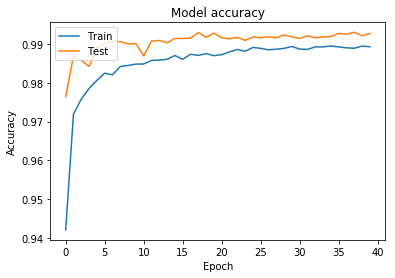

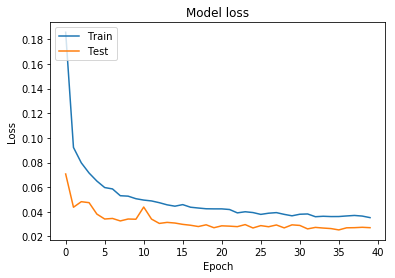

In [16]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Evaluating model and storing score in a variable.

In [0]:
#score = model.evaluate(X_test, Y_test, verbose=0)
score = model.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=0)

Printing loss and accuracy of model test done in last step

In [18]:
print(score)

[0.026913239004462956, 0.9928]


Predicting out put for test inputs

In [0]:
y_pred = model.predict(X_test)

Printing prediction and test out puts 

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[1.24221547e-02 3.54038434e-06 2.01050732e-02 7.87114186e-05
  5.29771522e-02 1.06812013e-05 6.55020238e-04 6.89718348e-04
  9.00270045e-01 1.27879325e-02]
 [1.77288782e-02 1.92381071e-06 1.01173879e-03 1.24055499e-04
  4.48826235e-03 1.04721250e-04 1.31192766e-02 1.70118412e-07
  9.56828237e-01 6.59272633e-03]
 [2.32375969e-04 4.68442096e-07 6.09059935e-04 3.59252008e-05
  1.88966785e-02 1.41250148e-05 1.56994769e-03 4.15197792e-06
  9.76994514e-01 1.64278387e-03]
 [1.74037397e-01 7.08106569e-08 5.68384212e-03 3.12467928e-05
  5.11291483e-03 2.44644179e-04 5.10174828e-03 1.29927560e-06
  7.35065341e-01 7.47215375e-02]
 [9.56606877e-04 1.89177074e-09 4.36961709e-04 6.85132818e-07
  2.73824841e-01 9.10399763e-07 1.29747391e-03 1.67724647e-06
  7.19932318e-01 3.54853761e-03]
 [2.95896840e-04 2.55183750e-07 3.19128041e-04 2.64544105e-05
  1.23387640e-02 1.11521722e-05 1.48886000e-03 2.55877194e-06
  9.84856188e-01 6.60754449e-04]
 [5.22673508e-05 5.04614572e-09 9.54287010e-04 3.91202957e

Find out 25 misclassified images from the validation dataset and create an image gallery

Refering: https://www.kaggle.com/rajmehra03/flower-recognition-cnn-keras


In [46]:
#incorrects = np.nonzero(y_pred.reshape((-1,)) != y_test)

# importing necessary lib
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

# Finding out indices for properly classified and missclassified images

y_pred_digits=np.argmax(y_pred,axis=1)
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==y_pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==y_pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==25):
        break

print(mis_class)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


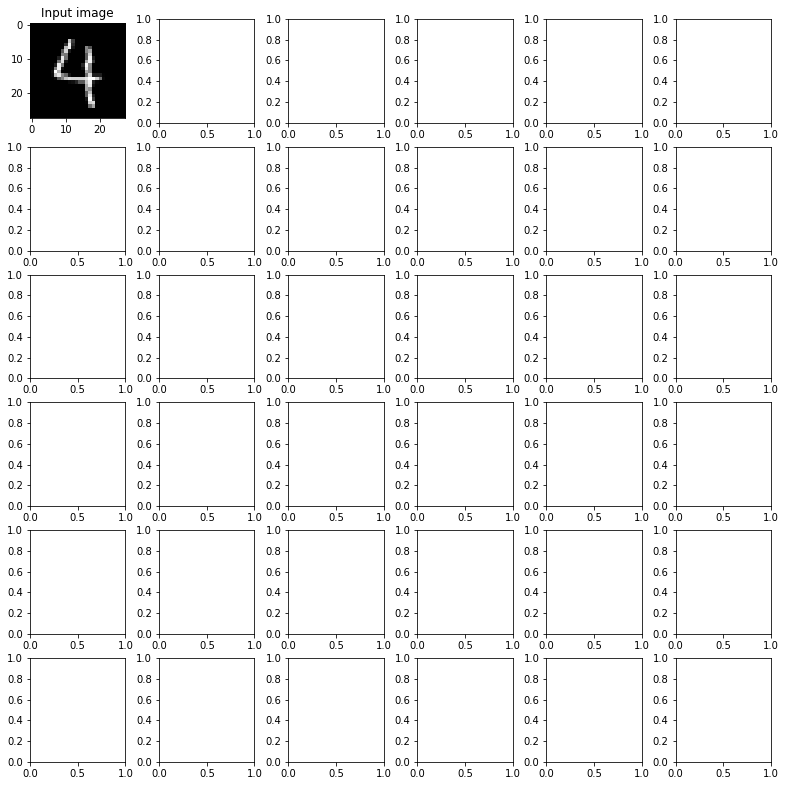

In [57]:
#Showing 25 missclassified images

#importing lebal encoder from scikit
from sklearn.preprocessing import LabelEncoder as le

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#preparing X_test data for visualization
img = np.array(X_test[2]).reshape((1, 28, 28, 1)).astype(np.float64)

count=0
plot_x=6
plot_y=6
fig,ax=plt.subplots(6, 6, figsize = (12, 12)) #plt.subplots(4,2)

ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
ax[0, 0].set_title('Input image')
#fig.suptitle('Input image and %s filters' % (layer_name,))
#fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    
#fig.set_size_inches(15,15)
'''
for i in range (6):
    for j in range (6):
        ax[i,j].imshow(img[mis_class[count]].reshape((28, 28)), cmap = 'gray')
        ax[i,j].set_title("Predicted Number : "+str(le.inverse_transform([y_pred_digits[mis_class[count]]]))+"\n"
                          +"Actual Number : "+str(le.inverse_transform(np.argmax([y_test[mis_class[count]]]))) )
        plt.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
        count+=1
        if count == 25:
          break
'''

for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[i,j].imshow(np.array(X_test[mis_class[count]]).reshape((28, 28)).astype(np.float64), cmap = 'gray')
        plt.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
        count+=1
        if count == 25:
          break
        

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()